In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
data = pd.read_excel('default_of_credit_card_clients.xls', skiprows=1)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data.rename(columns={'default payment next month': 'Default'}, inplace=True)
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
print("Podgląd danych:")
display(data.head())
print("\nRozmiar zbioru:", data.shape)
print("\nTypy danych:")
print(data.dtypes)

Podgląd danych:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



Rozmiar zbioru: (30000, 25)

Typy danych:
ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object


In [5]:
print("\nPrzypadki gdzie klient nie spłacił(1) lub spłacił(0)")
print(data['Default'].value_counts())


Przypadki gdzie klient nie spłacił(1) lub spłacił(0)
Default
0    23364
1     6636
Name: count, dtype: int64


In [6]:
print("\nStatystyki opisowe:")
data.describe()


Statystyki opisowe:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
print("\nBrakujące wartości w zbiorze danych")
print(data.isnull().sum())


Brakujące wartości w zbiorze danych
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64


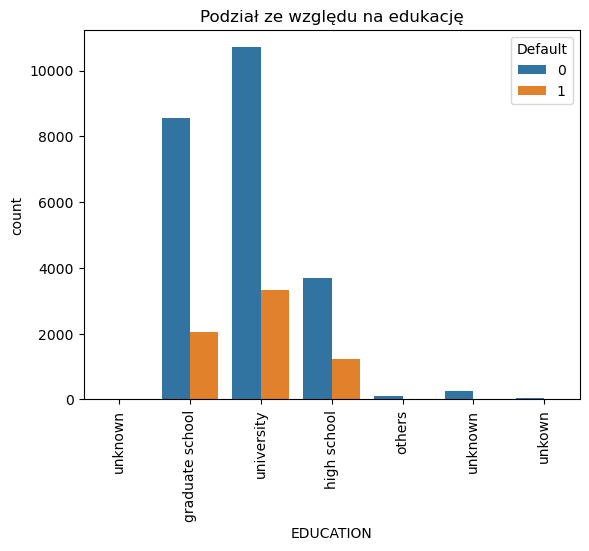

In [8]:
plt.title('Podział ze względu na edukację')
ax2 = sns.countplot(x='EDUCATION', hue='Default', data=data)
ax2.set_xticklabels(['unknown','graduate school','university','high school','others','unknown','unkown'], rotation=90)
plt.show()

In [9]:
#Wniosek: Większość dłużników ma wykształcenie wyższe, uniwersyteckie i licealne. Wśród nich klienci z wykształceniem wyższym częściej niż inni
#nie spłacają rat.

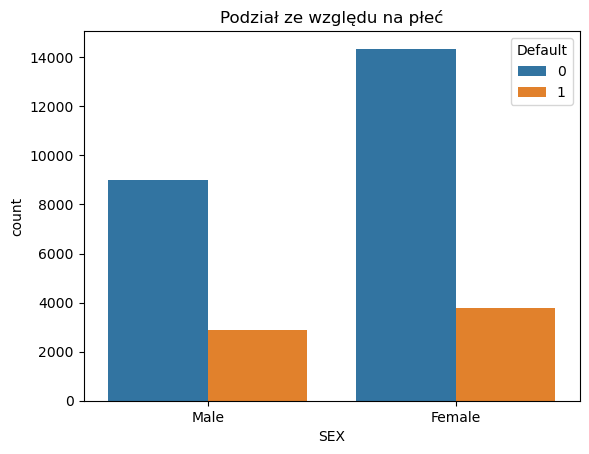

In [10]:
plt.title("Podział ze względu na płeć")
ax3 = sns.countplot(x='SEX', hue='Default', data=data)
ax3.set_xticklabels(['Male', 'Female'])
plt.show()

In [11]:
#Wnioski: Kobiety częściej nie spłacają rat niż mężczyźni.

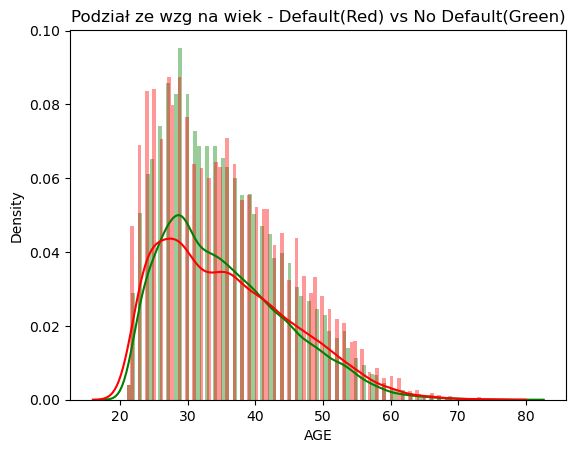

In [12]:
plt.title("Podział ze wzg na wiek - Default(Red) vs No Default(Green)")
nodefault = data[data['Default']==0]['AGE']
default = data[data['Default']==1]['AGE']
sns.distplot(nodefault, bins=100, color='green')
sns.distplot(default, bins=100, color='red')
plt.show()

In [13]:
#Wnioski: Do 30 roku życa wzrasta prawdopodobieństwo niespłacalności rat. Po 30 roku życia to prawodopodobieństwo maleje wraz z wiekiem

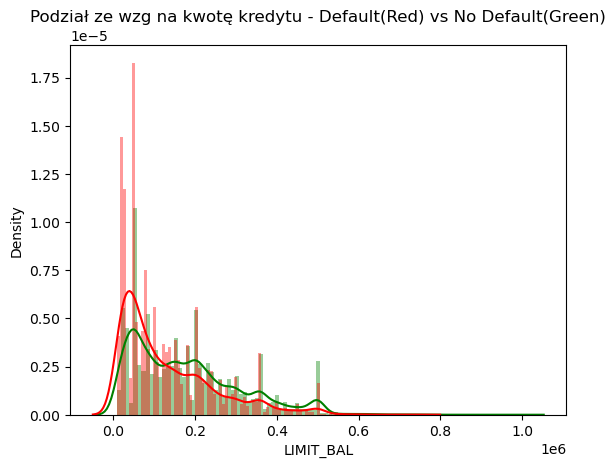

In [14]:
plt.title("Podział ze wzg na kwotę kredytu - Default(Red) vs No Default(Green)")
nodefault1 = data[data['Default']==0]['LIMIT_BAL']
default1 = data[data['Default']==1]['LIMIT_BAL']
sns.distplot(nodefault1, bins=100, color='green')
sns.distplot(default1, bins=100, color='red')
plt.show()

In [15]:
#Wnioski: Największą tendencję do niewypłacalności mają klienci z mniejszymi kwotami. Szczególnie Ci z kwotą 50tys.

In [16]:
#wybieramy cechy - wszystkie oprócz Default
X = data.drop(['Default'], axis=1)
y = data['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (21000, 24)
Rozmiar zbioru testowego: (9000, 24)


In [45]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

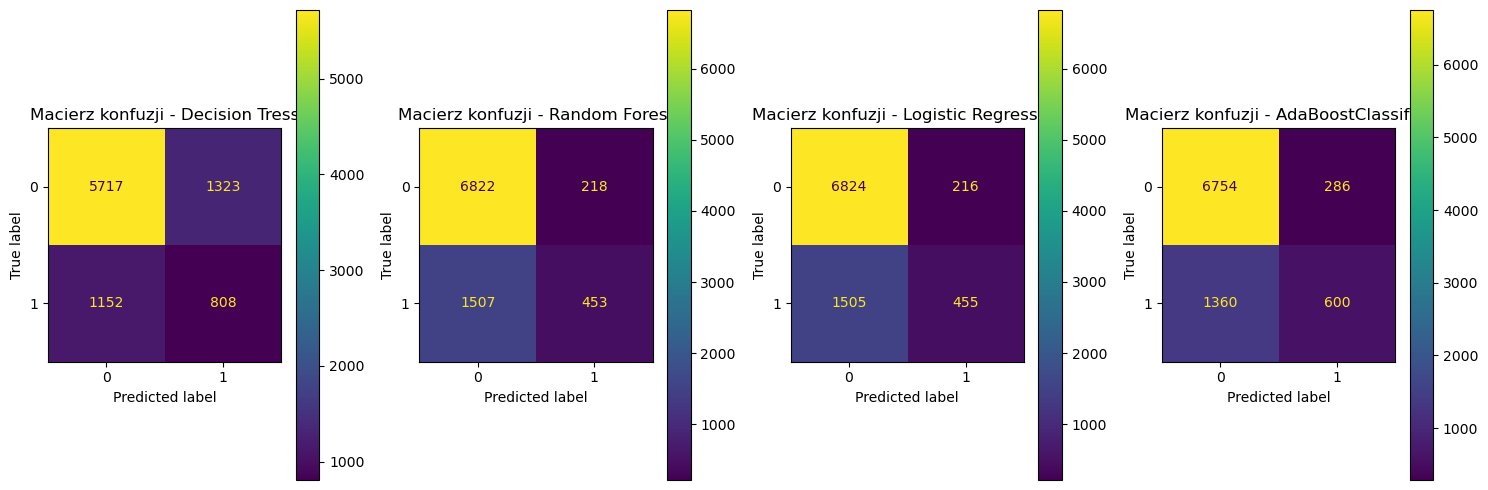

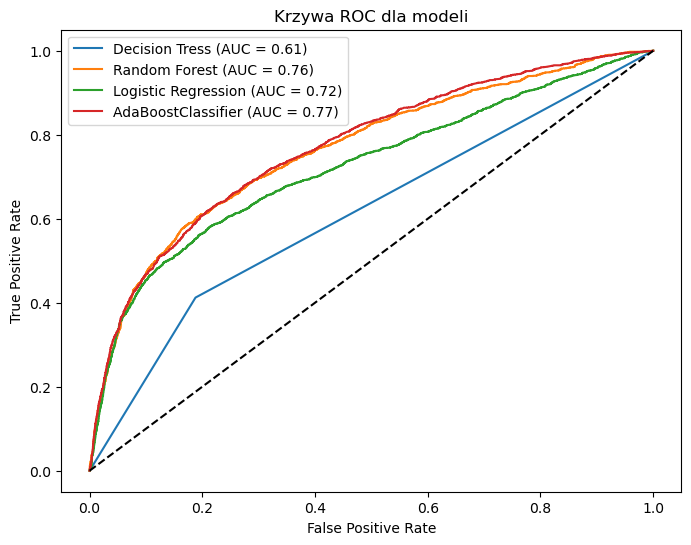

In [46]:
models = {"Decision Tress": dt_model, "Random Forest": rf_model, "Logistic Regression": lr_model, "AdaBoostClassifier": ada_model}

plt.figure(figsize=(15,5))
for i, (name, model) in enumerate (models.items()):
    y_pred = model.predict(X_test)
    plt.subplot(1, 4, i+1)
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(ax=plt.gca())
    plt.title(f'Macierz konfuzji - {name}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla modeli')
plt.legend()
plt.show()

In [31]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Dokładność (accuracy): {accuracy_score(y_test, y_pred)}")
    print("\nRaport klasyfikacji:")
    print(classification_report(y_test, y_pred))
    print("Macierz pomyłek:")
    print(confusion_matrix(y_test, y_pred))

In [32]:
print("\nEwaluacja Drzewa Decyzyjnego")
evaluate_model(dt_model, X_test, y_test)

print("\nEwaluacja Random Forest")
evaluate_model(rf_model, X_test, y_test)

print("\nEwaluacja Regresji Logistycznej")
evaluate_model(lr_model, X_test, y_test)

print("\nEwaluacja AdaBoost")
evaluate_model(ada_model, X_test, y_test)


Ewaluacja Drzewa Decyzyjnego
Dokładność (accuracy): 0.8205555555555556

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.70      0.31      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

Macierz pomyłek:
[[6776  264]
 [1351  609]]

Ewaluacja Random Forest
Dokładność (accuracy): 0.8083333333333333

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7040
           1       0.67      0.23      0.35      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Macierz pomyłek:
[[6818  222]
 [1503  457]]

Ewaluacja Regresji Logistycznej
Dokładność (accuracy): 0.8087777777777778


In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
test_score = grid_search.best_estimator_.score(X_test, y_test)

best_params, best_score, test_score

({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.3817331687919923,
 0.8157777777777778)

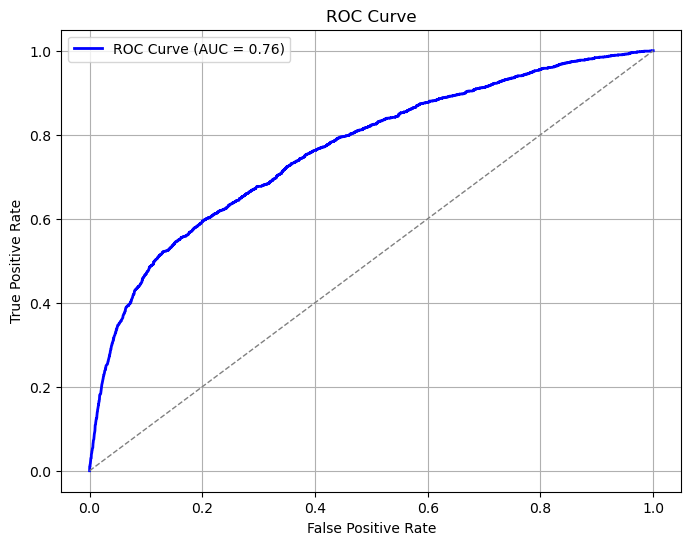

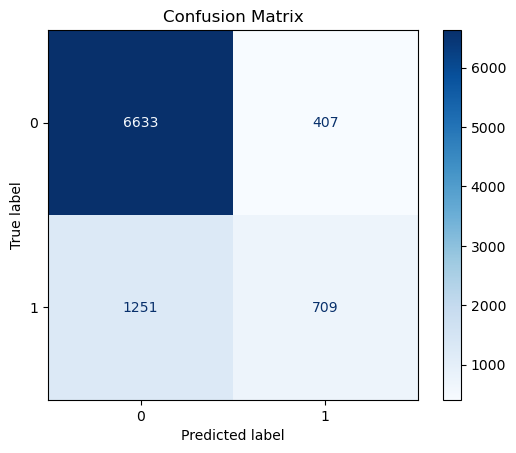

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.64      0.36      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



In [23]:
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred = grid_search.best_estimator_.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [42]:
rf_model = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', {0: 1, 1: 4}]
}

random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_distributions, 
    n_iter=50, cv=5, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1), random_state=42, verbose=2
)
random_search.fit(X_train, y_train)

print("Najlepsze parametry:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Najlepsze parametry: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced'}



Macierz konfuzji:


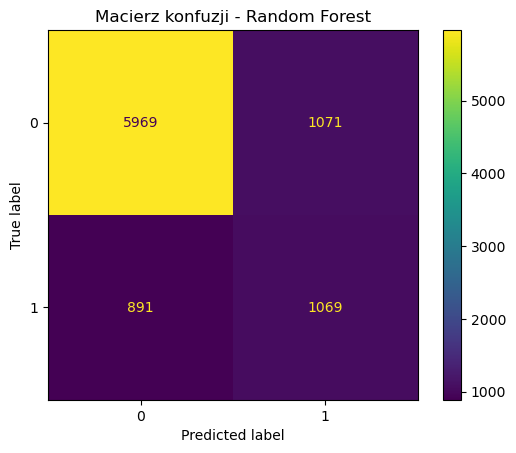


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7040
           1       0.50      0.55      0.52      1960

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000



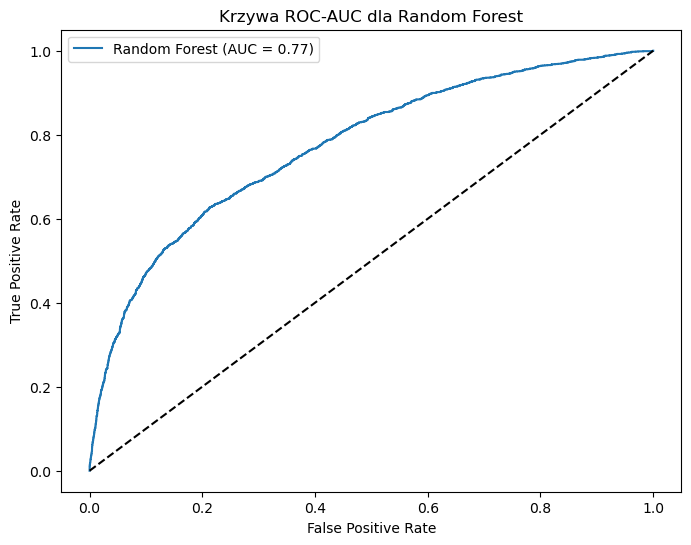

In [43]:
best_rf_model = random_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

print("\nMacierz konfuzji:")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()
plt.title('Macierz konfuzji - Random Forest')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


fpr, tpr, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC-AUC dla Random Forest')
plt.legend()
plt.show()

In [48]:
param_distributions = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', {0: 1, 1: 4}]
}

dt_model = DecisionTreeClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=dt_model, param_distributions=param_distributions, 
    n_iter=50, cv=5, n_jobs=-1, scoring=make_scorer(f1_score, pos_label=1), 
    random_state=42, verbose=2
)
random_search.fit(X_train, y_train)

print("Najlepsze parametry:", random_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Najlepsze parametry: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': 'balanced'}



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      7040
           1       0.44      0.55      0.49      1960

    accuracy                           0.75      9000
   macro avg       0.65      0.68      0.66      9000
weighted avg       0.77      0.75      0.76      9000



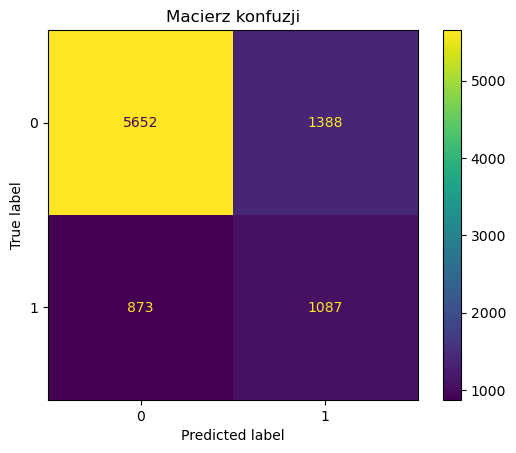

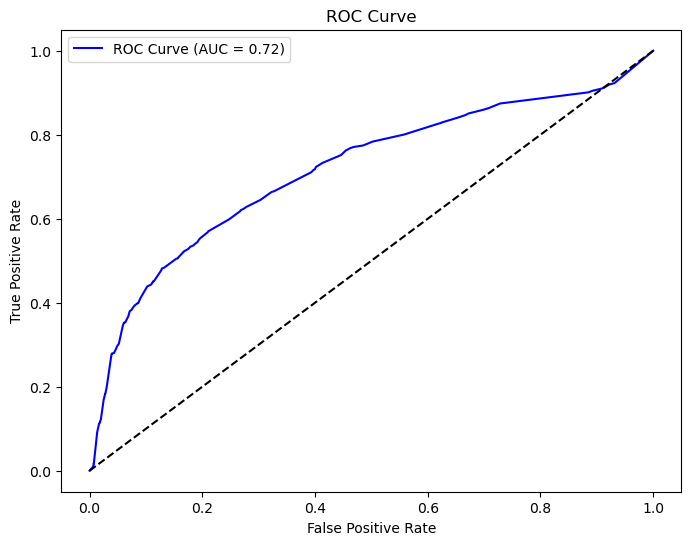

In [64]:
best_dt_model = random_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)
y_pred_proba = best_dt_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(best_dt_model, X_test, y_test)
plt.title("Macierz konfuzji")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [53]:
param_distributions_ada = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada_model = AdaBoostClassifier(random_state=42)

random_search_ada = RandomizedSearchCV(
    estimator=ada_model, param_distributions=param_distributions_ada, 
    n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42
)
random_search_ada.fit(X_train, y_train)

print("Najlepsze parametry dla AdaBoost:", random_search_ada.best_params_)

Najlepsze parametry dla AdaBoost: {'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}


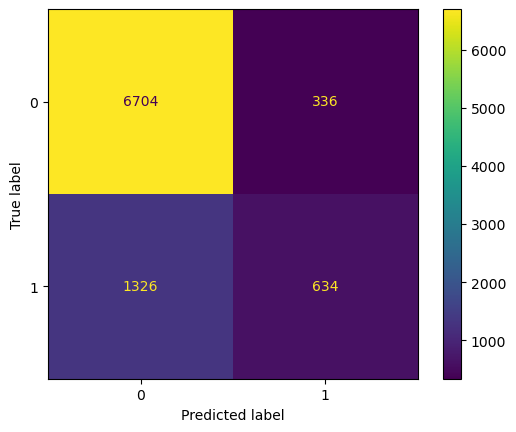


Classification Report AdaBoost:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.65      0.32      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



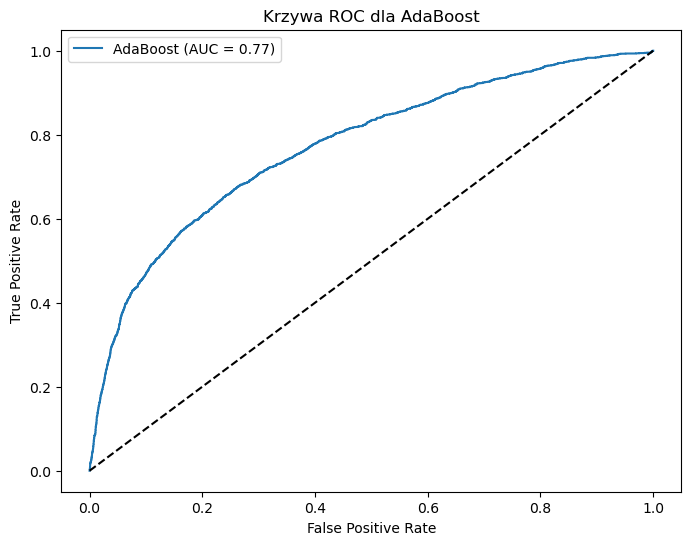

In [60]:
y_pred_ada = random_search_ada.best_estimator_.predict(X_test)
y_pred_proba_ada = random_search_ada.best_estimator_.predict_proba(X_test)[:, 1]

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ada)
plt.show()

print("\nClassification Report AdaBoost:")
print(classification_report(y_test, y_pred_ada))

plt.figure(figsize=(8, 6))
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla AdaBoost')
plt.legend()
plt.show()

In [57]:
param_distributions_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1.0, 10.0, 100.0],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

lr_model = LogisticRegression(max_iter=1000)

random_search_lr = RandomizedSearchCV(
    estimator=lr_model, param_distributions=param_distributions_lr, 
    n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42
)
random_search_lr.fit(X_train, y_train)

print("Najlepsze parametry dla Logistic Regression:", random_search_lr.best_params_)

Najlepsze parametry dla Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.1}


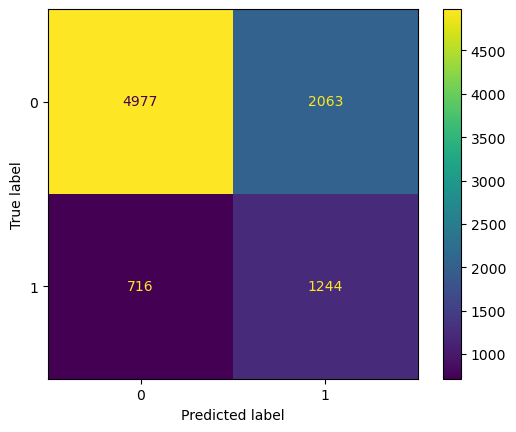


Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7040
           1       0.38      0.63      0.47      1960

    accuracy                           0.69      9000
   macro avg       0.63      0.67      0.63      9000
weighted avg       0.77      0.69      0.71      9000



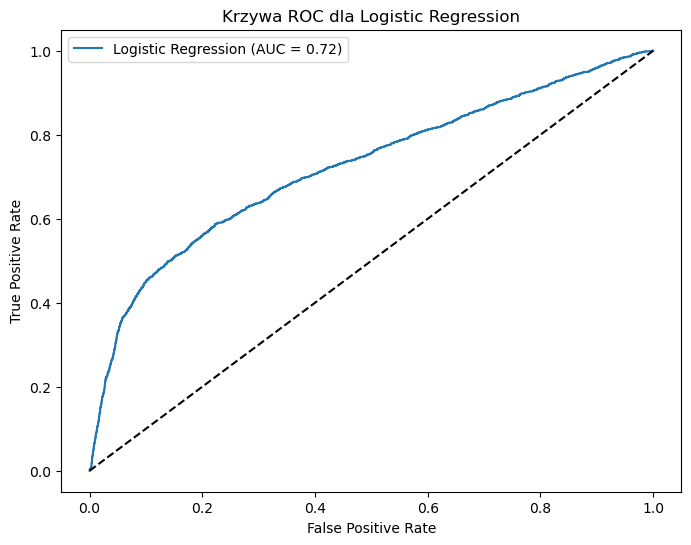

In [61]:
y_pred_lr = random_search_lr.best_estimator_.predict(X_test)
y_pred_proba_lr = random_search_lr.best_estimator_.predict_proba(X_test)[:, 1]

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC dla Logistic Regression')
plt.legend()
plt.show()

In [66]:
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
ada_report = classification_report(y_test, y_pred_ada, output_dict=True)

rf_df = pd.DataFrame(rf_report).transpose().assign(Model='Random Forest')
lr_df = pd.DataFrame(lr_report).transpose().assign(Model='Logistic Regression')
dt_df = pd.DataFrame(dt_report).transpose().assign(Model='Decision Tree')
ada_df = pd.DataFrame(ada_report).transpose().assign(Model='AdaBoost')

summary_df = pd.concat([rf_df, lr_df, dt_df, ada_df])
summary_df = summary_df.loc[['0', '1'], ['precision', 'recall', 'f1-score', 'Model']]

print("Podsumowanie wyników dla modeli:")
print(summary_df)

Podsumowanie wyników dla modeli:
   precision    recall  f1-score                Model
0   0.870117  0.847869  0.858849        Random Forest
0   0.874232  0.706960  0.781748  Logistic Regression
0   0.866207  0.802841  0.833321        Decision Tree
0   0.834869  0.952273  0.889715             AdaBoost
1   0.499533  0.545408  0.521463        Random Forest
1   0.376172  0.634694  0.472375  Logistic Regression
1   0.439192  0.554592  0.490192        Decision Tree
1   0.653608  0.323469  0.432765             AdaBoost


In [68]:
#Wnioski: wybrałam do klasyfikacji RandomForest, LogisticRegression, DecisionTree i AdaBoost
#od samego początku miałam problem z klasyfikacją klasy 1
# w celu poprawy zastosowałam RandomizedSearchCV z parametrem scoring=f1 i class_weight=balanced
#taki wybór pozwolił na zbalansowanie klas i co za tym idzie na lepsze wyniki na klasie 1
#jeśli chodzi o klasę 0 to każdy z klasyfikatorów poradził sobie dobrze ale najlepiej RandomForest i AdaBoost
#jeśli chodzi o klasę 1 to najlepsze wyniki f1 ma RandomForest
#podsumowaując najepiej poradził sobie RandomForest